# Continuous alignment of drosophila stereo-seq dataset

In [1]:
import os
import sys
from pathlib import Path
import anndata as ad

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho

## Read data and create AnnData object

In [2]:
os.chdir("/media/yao/Yao/Projects/Project_morpho/slices-E8-10_b")
data_folder = 'cellbin_h5ad'
save_image_folder = "slices_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
files = [filename for root1, dirs1, files1 in os.walk(data_folder) for filename in files1][:6]
slices = [ad.read_h5ad(os.path.join(data_folder, slices1_file)) for slices1_file in files]
slices

[AnnData object with n_obs × n_vars = 1769 × 9158
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1244 × 8992
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1715 × 9145
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1741 × 9147
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1956 × 8976
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1700 × 9305
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial']

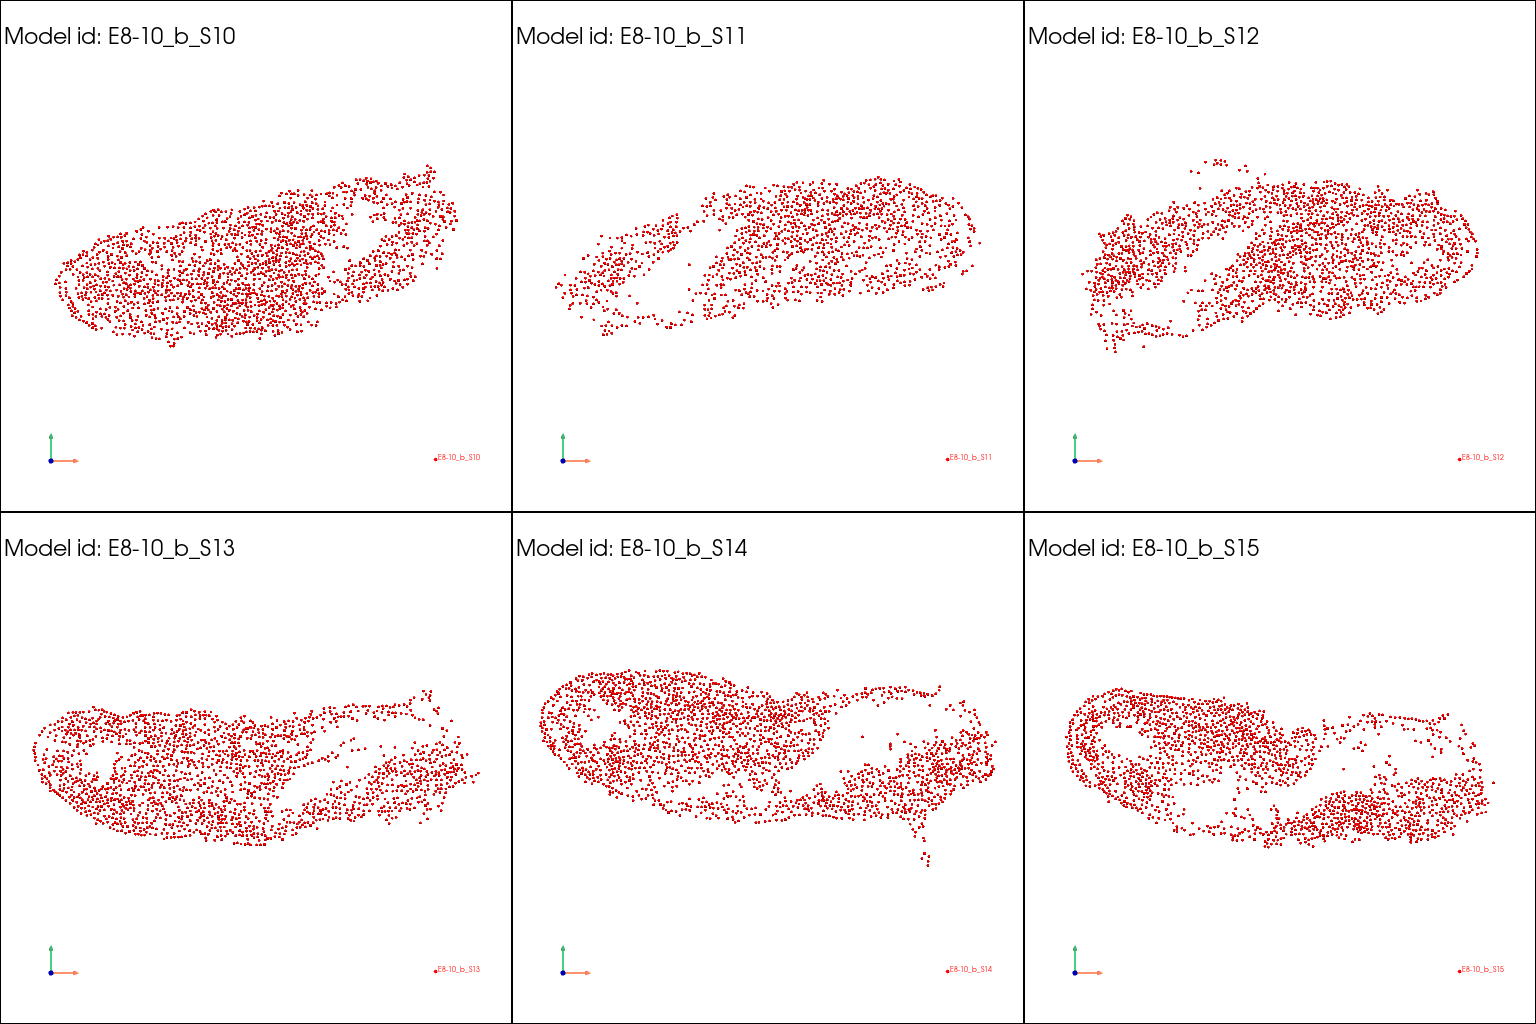

In [7]:
_ = morpho.multi_models(
    slices, spatial_key="spatial", center_zero=True, id_key="slices", jupyter="static", show_legend=True,
    filename=os.path.join(save_image_folder, "E8-10_b_continuous_raw_spatial_slices.pdf")
)

## Slices alignment based on Morpho

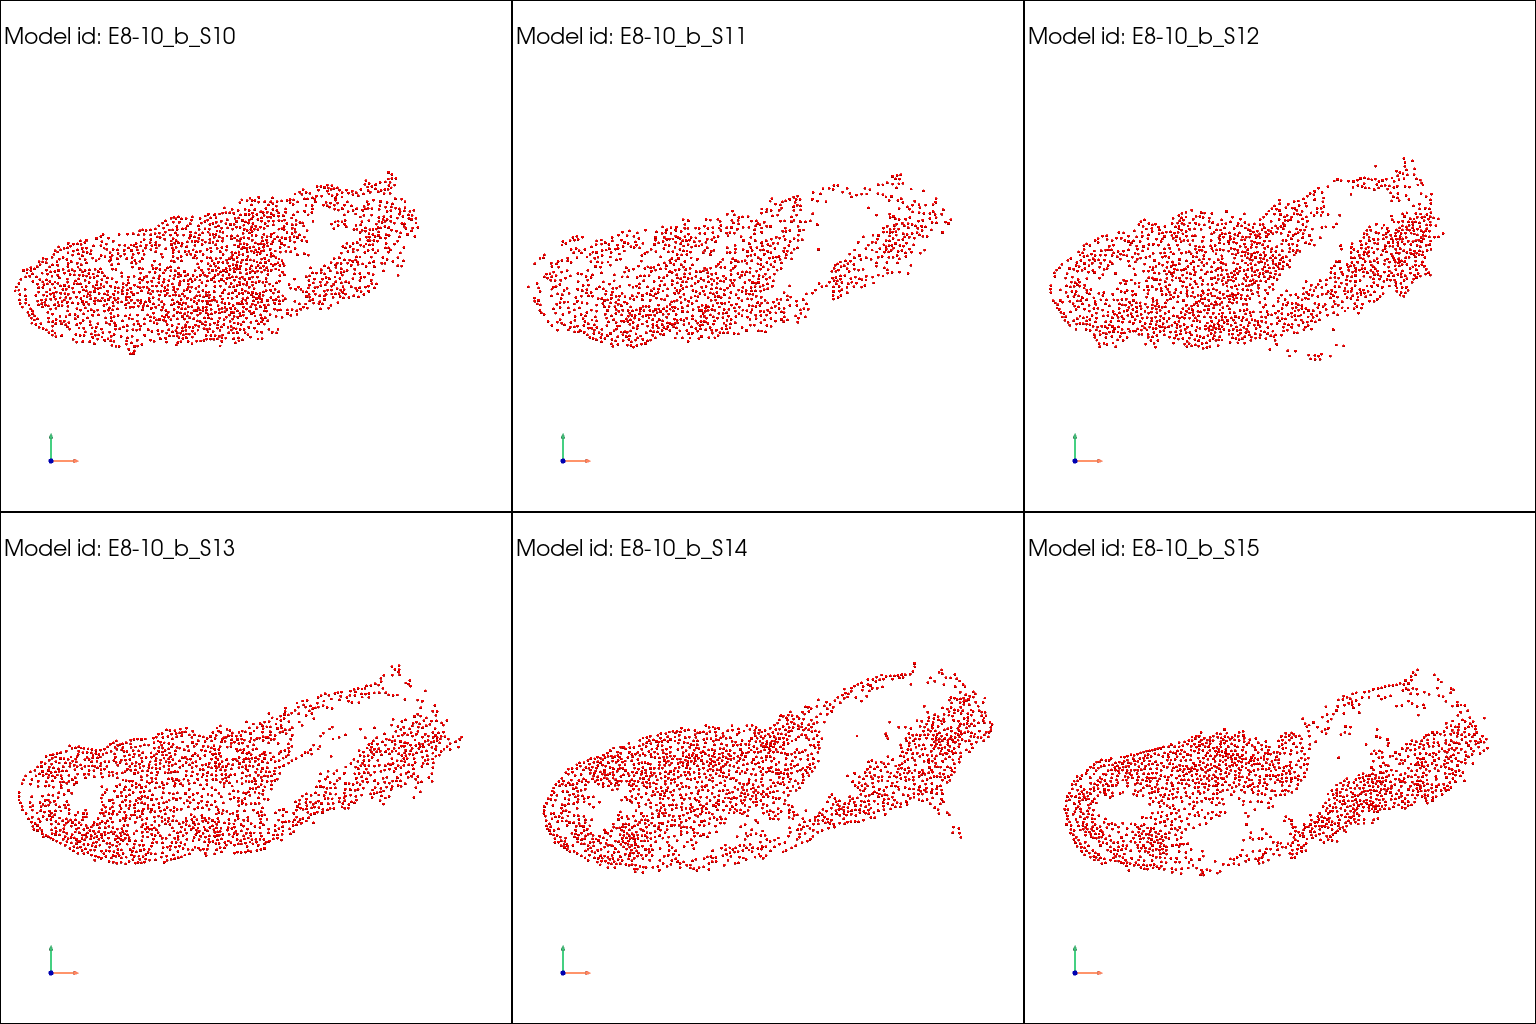

In [8]:
align_slices1, _ = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    normalize_c=True,
    device="0",
    verbose=False,
)
_ = morpho.multi_models(
    align_slices1, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_continuous_morpho_spatial_slices.pdf")
)

## Slices alignment based on Paste

|-----> [Models alignment] in progress: 20.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 40.0000%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignment] in progress: 60.0000%|-----> Filtered all samples for common genes. There are 8331 common genes.
|-----> [Models alignment] in progress: 80.0000%|-----> Filtered all samples for common genes. There are 8256 common genes.
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 8264 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [15.5885s]


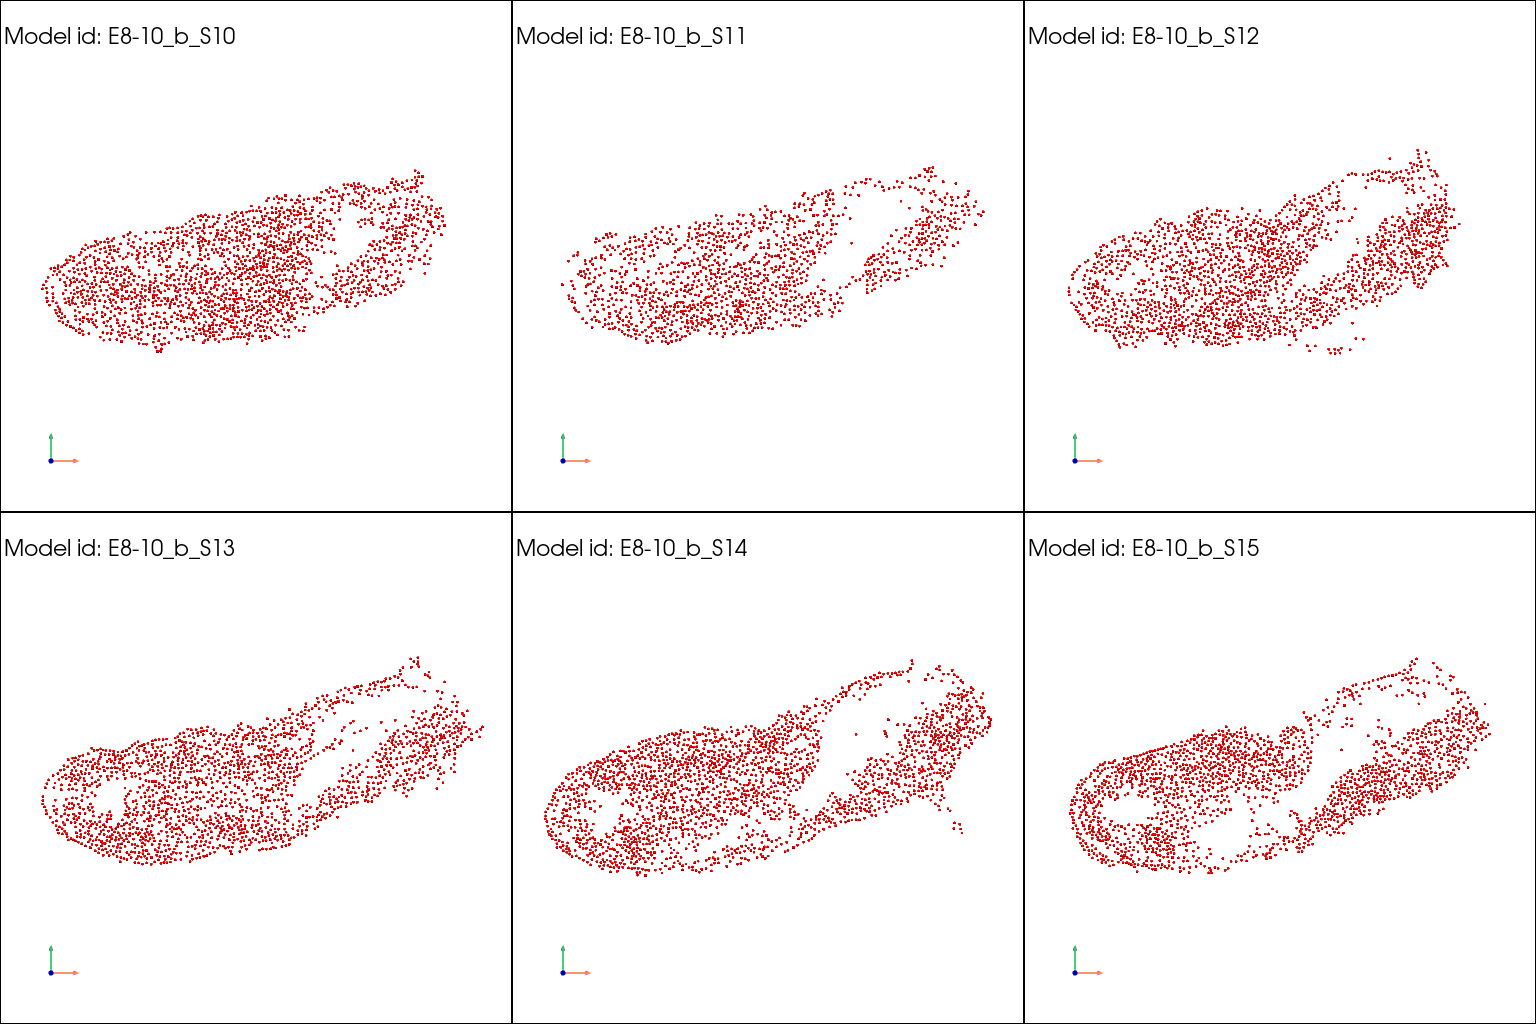

In [9]:
align_slices2, _ = morpho.models_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    alpha=0.01,
    device="0",
)
_ = morpho.multi_models(
    align_slices2, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_continuous_paste_spatial_slices.pdf")
)